# Centro de Investigación en Matemáticas
# Inteligencia Artificial
## Tarea 2. Autoencoder
### José Miguel Saavedra Aguilar

In [8]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

Haremos un autoencoder con una red de dos capas, esto es:

\begin{equation}
    \begin{aligned}
        y_0 &= x\\
        z_1 &= W_1 y_0 + b_1\\
        y_1 &= \phi_1(z_1)\\
        z_2 &= W_2 y_1 + b_2\\
        y_2 &= \phi_2(z_2)\\
        z_3 &= W_3 y_2 + b_3\\
        \hat{x} &= \phi_3(z_3)\\
    \end{aligned}
\end{equation}

Considerando la función de costo MSE:

\begin{align}
    \frac{1}{2}\| x-\hat{x} \|_2
\end{align}

Utilizaremos la función de activación sigmoide

\begin{align*}
    \phi(x) &= \frac{1}{1 + e^{-x}}
\end{align*}

cuya derivada es

\begin{align*}
    \phi^{\prime}(x) &= \phi(x) \left(1-\phi(x)\right)
\end{align*}

Inicializamos la red. Se creo como clase para poder correr el entrenamiento varias veces de ser necesario.

Se inician los pesos aleatorios distribuidos normales con media $\mu = 0$ y desviación estándar $\sigma = 0.1$. El tamaño de paso inicial es $10^{-5}$ pues en los puntos iniciales, el gradiente puede movernos en exceso.

Para la backpropagation, haremos derivación paso a paso para cada observación de $x_i$:

\begin{align*}
    y_0 &= x\\
    z_1 &= W_1 y_0 + b_1\\
    y_1 &= \phi_1(z_1)\\
    z_2 &= W_2 y_1 + b_2\\
    y_2 &= \phi_2(z_2)\\
    z_3 &= W_3 y_2 + b_3\\
    \frac{\partial L}{\partial y_3} &= y_3 - x\\
    \frac{\partial y_3}{\partial z_3} &= \phi(z_3) (1-\phi(z_3))\\
    \frac{\partial z_3}{\partial W_3} &= y_2\\
    \frac{\partial z_3}{\partial b_3} &= 1\\
    \frac{\partial y_2}{\partial z_2} &= \phi(z_2) (1-\phi(z_2))\\
    \frac{\partial z_2}{\partial W_2} &= y_1\\
    \frac{\partial z_2}{\partial b_2} &= 1\\
    \frac{\partial y_1}{\partial z_1} &= \phi(z_1) (1-\phi(z_1))\\
    \frac{\partial z_1}{\partial W_1} &= y_0\\
    \frac{\partial z_1}{\partial b_1} &= 1
\end{align*}

De forma que:

\begin{align*}
    delta_3 &= (y_3 - X) * y_3 * (1-y_3)\\       
    delta_2 &= np.dot(self.W3.T, self.delta3) * self.sigmoid_derivative(self.y2)\\
    self.delta1 = np.dot(self.W2.T, self.delta2) * self.sigmoid_derivative(self.y1)\\
    self.W3_grad =  np.dot(self.delta3, self.y2.T)\\
    self.b3_grad = np.sum(self.delta3, axis=1, keepdims=True)\\
    self.W2_grad = np.dot(self.delta2, self.y1.T)\\
    self.b2_grad = np.sum(self.delta2, axis=1, keepdims=True)\\
    self.W1_grad = np.dot(self.delta1, X.T)\\
    self.b1_grad = np.sum(self.delta1, axis=1, keepdims=True)
\end{align*}

In [2]:
class NeuralNetwork:
    def __init__(self,input_size, hidden_size1, hidden_size2, output_size):
        self.input_size = input_size
        self.hidden_size1 = hidden_size1
        self.hidden_size2 = hidden_size2
        self.output_size = output_size
        self.learning_rate = 1e-5
        # Initialize weights and biases for the first hidden layer
        self.W1 = 0.1*np.random.randn(hidden_size1, input_size)
        self.b1 = np.zeros((hidden_size1, 1))
        
        # Initialize weights and biases for the second hidden layer
        self.W2 = 0.1*np.random.randn(hidden_size2, hidden_size1)
        self.b2 = np.zeros((hidden_size2, 1))
        
        # Initialize weights and biases for the output layer
        self.W3 = 0.1*np.random.randn(output_size, hidden_size2)
        self.b3 = np.zeros((output_size, 1))
        
    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X))

    def sigmoid_derivative(self, X):
        return X * (1 - X)
    
    def forward(self, X):
        # Forward pass through the first hidden layer
        self.z1 = self.W1 @ X + self.b1
        self.y1 = self.sigmoid(self.z1)
        
        # Forward pass through the second hidden layer
        self.z2 = self.W2 @ self.y1 + self.b2
        self.y2 = self.sigmoid(self.z2)
        
        # Forward pass through the output layer
        self.z3 = self.W3 @ self.y2 + self.b3
        self.y3 = self.sigmoid(self.z3)
    
    def backward(self, X):
        # Backpropagation through the output layer
        self.delta3 = (self.y3 - X) * self.sigmoid_derivative(self.y3)
        
        # Backpropagation through the second hidden layer
        self.delta2 = np.dot(self.W3.T, self.delta3) * self.sigmoid_derivative(self.y2)
        
        # Backpropagation through the first hidden layer
        self.delta1 = np.dot(self.W2.T, self.delta2) * self.sigmoid_derivative(self.y1)
        
        # Calculate gradients
        self.W3_grad =  np.dot(self.delta3, self.y2.T)
        self.b3_grad = np.sum(self.delta3, axis=1, keepdims=True)
        
        self.W2_grad = np.dot(self.delta2, self.y1.T)
        self.b2_grad = np.sum(self.delta2, axis=1, keepdims=True)
        
        self.W1_grad = np.dot(self.delta1, X.T)
        self.b1_grad = np.sum(self.delta1, axis=1, keepdims=True)
        
        self.W1 -= self.learning_rate * self.W1_grad
        self.b1 -= self.learning_rate * self.b1_grad
        self.W2 -= self.learning_rate * self.W2_grad
        self.b2 -= self.learning_rate * self.b2_grad
        self.W3 -= self.learning_rate * self.W3_grad
        self.b3 -= self.learning_rate * self.b3_grad
    
    def loss(self, X):
        return np.mean(np.square(X - self.y3))
        
    def train(self, X, epochs, batch_size, learning_rate=1e-3):
        num_samples = X.shape[1]
        
        self.forward(X)
        self.backward(X)
        self.learning_rate = learning_rate
        stages = epochs // 100
        self.losses = np.zeros(100)
        for i in range(100):
            for j in range(stages):
                subsample = np.random.choice(num_samples, batch_size, replace=False)
                x_batch = X[:, subsample]
                self.forward(x_batch)
                self.backward(x_batch)
            self.learning_rate = max(1e-4, self.learning_rate * 0.5)
            self.forward(X)
            self.backward(X)
            self.losses[i] = self.loss(X)
            thisEpoch = stages*(i + 1)
            print(f"Epoch {thisEpoch}, Loss: {self.losses[i]:.4f}")

In [3]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, cache=True)
X = mnist['data']
X = X.astype(np.float32)

# Normalize the input data
X /= 255.0

# Convert X and y to numpy arrays
X = np.array(X).T

In [4]:
# Set up neural network parameters
input_size = X.shape[0]
hidden_size1 = 128
hidden_size2 = 32
output_size = input_size  # Output size is same as input size for autoencoder
batch_size = 256
learning_rate = 1e-3
epochs = 10000

In [5]:
model = NeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)

In [6]:
model.train(X, epochs, batch_size, learning_rate)

Epoch 100, Loss: 0.0675
Epoch 200, Loss: 0.0676
Epoch 300, Loss: 0.0624
Epoch 400, Loss: 0.0599
Epoch 500, Loss: 0.0583
Epoch 600, Loss: 0.0563
Epoch 700, Loss: 0.0548
Epoch 800, Loss: 0.0536
Epoch 900, Loss: 0.0522
Epoch 1000, Loss: 0.0508
Epoch 1100, Loss: 0.0496
Epoch 1200, Loss: 0.0485
Epoch 1300, Loss: 0.0476
Epoch 1400, Loss: 0.0467
Epoch 1500, Loss: 0.0459
Epoch 1600, Loss: 0.0452
Epoch 1700, Loss: 0.0447
Epoch 1800, Loss: 0.0441
Epoch 1900, Loss: 0.0436
Epoch 2000, Loss: 0.0429
Epoch 2100, Loss: 0.0423
Epoch 2200, Loss: 0.0416
Epoch 2300, Loss: 0.0409
Epoch 2400, Loss: 0.0406
Epoch 2500, Loss: 0.0399
Epoch 2600, Loss: 0.0394
Epoch 2700, Loss: 0.0391
Epoch 2800, Loss: 0.0385
Epoch 2900, Loss: 0.0379
Epoch 3000, Loss: 0.0375
Epoch 3100, Loss: 0.0370
Epoch 3200, Loss: 0.0366
Epoch 3300, Loss: 0.0362
Epoch 3400, Loss: 0.0358
Epoch 3500, Loss: 0.0354
Epoch 3600, Loss: 0.0350
Epoch 3700, Loss: 0.0347
Epoch 3800, Loss: 0.0343
Epoch 3900, Loss: 0.0340
Epoch 4000, Loss: 0.0337
Epoch 410

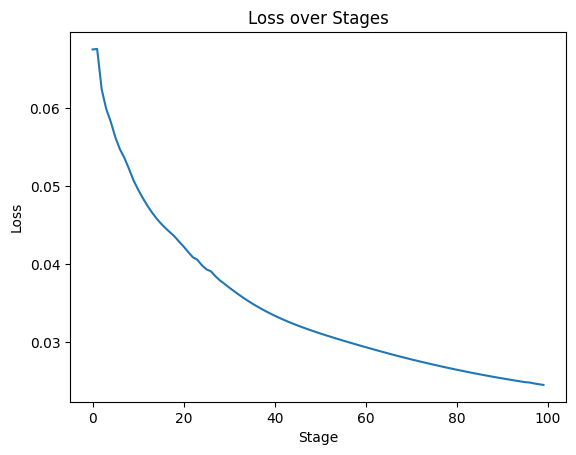

In [9]:
plt.plot(model.losses)
plt.xlabel('Stage')
plt.ylabel('Loss')
plt.title('Loss over Stages')
plt.show()
